<a href="https://colab.research.google.com/github/JeanFZC/Analisis-con-Python/blob/main/EDA_Covid19_Q_Fallecidos_Per%C3%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Importamos nuestras librerías que usaremos para este EDA.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fallecidos_covid.xlsx to fallecidos_covid.xlsx


Importamos nuestro dataset de cualquier carpeta de nuestra pc al google colab.

In [ ]:
df=pd.read_excel('fallecidos_covid.xlsx', sheet_name='Data_fallecidos_covid')

Leemos nuestro dataset importado desde el comando pd.read_excel y le indicamos la hoja si en caso tuviera más de una.

In [ ]:
df.shape

(213801, 10)

El comando shape nos indica que el dataset que se está analizando tiene 213,801 filas y 10 columnas.

In [ ]:
df.head(5)

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,20220715,20210420,62,FEMENINO,Criterio virolÃƒÂ³gico,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,12.0
1,20220715,20210508,74,MASCULINO,Criterio virolÃƒÂ³gico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,37.0
2,20220715,20210428,93,FEMENINO,Criterio virolÃƒÂ³gico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,40.0
3,20220715,20210420,85,MASCULINO,Criterio SINADEF,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,69.0
4,20220715,20220429,75,FEMENINO,Criterio virolÃƒÂ³gico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,89.0


Podemos ver que el comando head nos permite visualizar un poco sobre el dataset como las columnas indicadas y limitándolo a mostrarnos 5 registros. Observamos que los campos de fecha no tienen el formato adecuado.

In [ ]:
df.isna().sum()

FECHA_CORTE               0
FECHA_FALLECIMIENTO       0
EDAD_DECLARADA            0
SEXO                      0
CLASIFICACION_DEF         0
DEPARTAMENTO              0
PROVINCIA                 5
DISTRITO                  5
UBIGEO                    0
UUID                   2613
dtype: int64

Visualizamos que las variables o columnas UUID, Provincia y Distrito tienen valores nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213801 entries, 0 to 213800
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_CORTE          213801 non-null  int64  
 1   FECHA_FALLECIMIENTO  213801 non-null  int64  
 2   EDAD_DECLARADA       213801 non-null  int64  
 3   SEXO                 213801 non-null  object 
 4   CLASIFICACION_DEF    213801 non-null  object 
 5   DEPARTAMENTO         213801 non-null  object 
 6   PROVINCIA            213796 non-null  object 
 7   DISTRITO             213796 non-null  object 
 8   UBIGEO               213801 non-null  object 
 9   UUID                 211188 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 16.3+ MB


Podemos visualizar el tipo de dato de cada columna y la cantidad de registros que tienen. Los campos fecha_corte y fecha_fallecimiento tienen formato int cuando deberia ser date.

In [ ]:
df['FECHA_FALLECIMIENTO'] = pd.to_datetime(df['FECHA_FALLECIMIENTO'], format='%Y%m%d') 
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], format='%Y%m%d') 

Procedemos a cambiar los formatos de estas columnas a un campo de tipo date.

In [ ]:
df.head(5)

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,2022-07-15,2021-04-20,62,FEMENINO,Criterio virolÃƒÂ³gico,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,12.0
1,2022-07-15,2021-05-08,74,MASCULINO,Criterio virolÃƒÂ³gico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,37.0
2,2022-07-15,2021-04-28,93,FEMENINO,Criterio virolÃƒÂ³gico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,40.0
3,2022-07-15,2021-04-20,85,MASCULINO,Criterio SINADEF,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,69.0
4,2022-07-15,2022-04-29,75,FEMENINO,Criterio virolÃƒÂ³gico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,89.0


Hacemos nuevamente una visualización de los datos y las variables de fechas ya se encuentran con su tipo de dato correcto.

In [ ]:
df['CLASIFICACION_DEF'] = df['CLASIFICACION_DEF'].map({'Criterio clÃƒÂ­nico':'Criterio clínico',
                             'Criterio investigaciÃƒÂ³n EpidemiolÃƒÂ³gica':'Criterio investigación Epidemiológica',
                             'Criterio nexo epidemiolÃƒÂ³gico':'Criterio nexo epidemiológico',
                             'Criterio radiolÃƒÂ³gico':'Criterio radiológico',
                             'Criterio serolÃƒÂ³gico':'Criterio serológico',
                             'Criterio virolÃƒÂ³gico':'Criterio virológico',
                             'Criterio SINADEF':'Criterio SINADEF'})

Transformamos los valores de la columna clasificacion_def para luego poder ver unas gráficas en base a esta variable.

In [ ]:
df.head(5)

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,2022-07-15,2021-04-20,62,FEMENINO,Criterio virológico,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,12.0
1,2022-07-15,2021-05-08,74,MASCULINO,Criterio virológico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,37.0
2,2022-07-15,2021-04-28,93,FEMENINO,Criterio virológico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,40.0
3,2022-07-15,2021-04-20,85,MASCULINO,Criterio SINADEF,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,69.0
4,2022-07-15,2022-04-29,75,FEMENINO,Criterio virológico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,89.0


Vemos que ya no se encuentran valores raros en el campo clasificacion_def

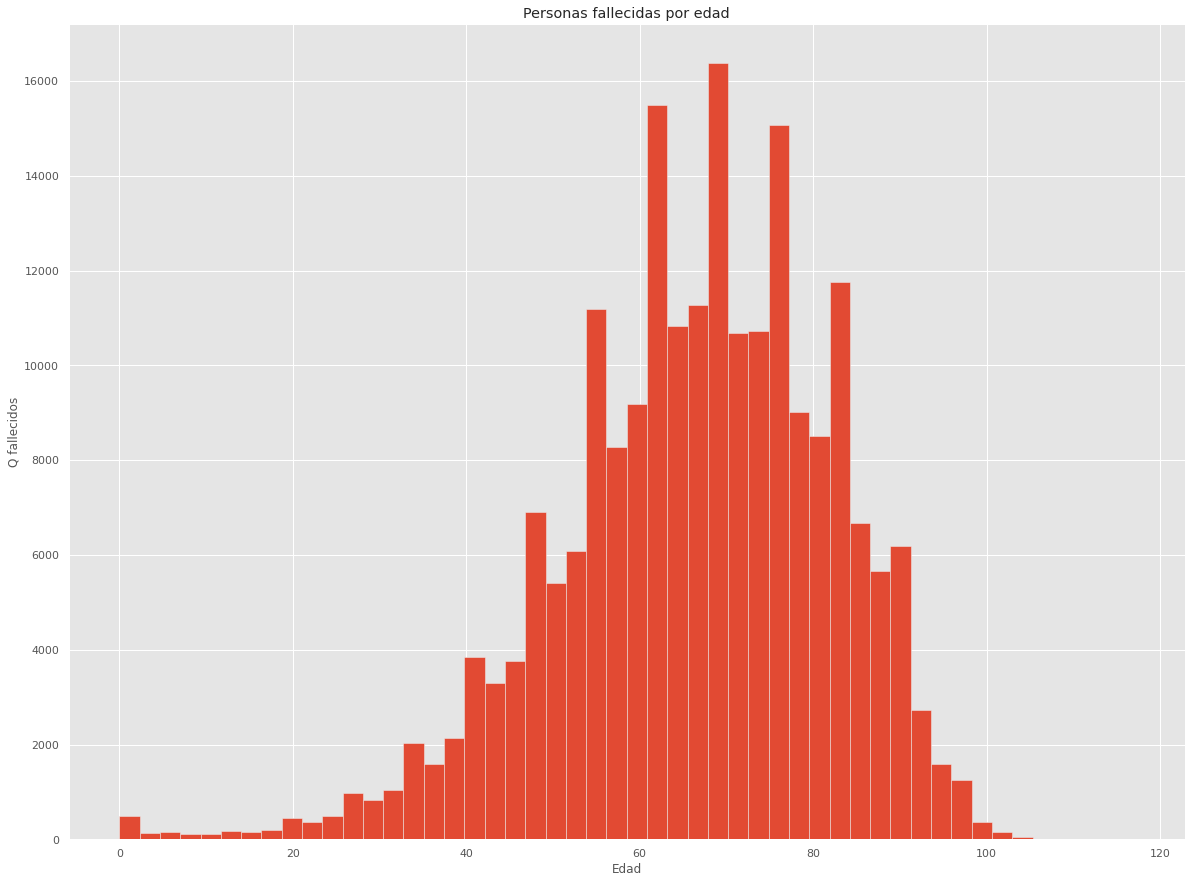

In [ ]:
Var=['EDAD_DECLARADA']
df[Var].hist(bins=50 ,figsize=(20,15))
plt.title('Personas fallecidas por edad')
plt.ylabel('Q fallecidos')
plt.xlabel('Edad');

Hacemos un histograma para ver la frecuencia de fallecidos en cuanto a la edad y se puede determinar que hay una tendencia a que fallezcan personas de la tercera edad.

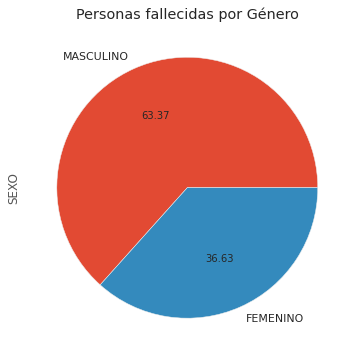

In [ ]:
df['SEXO'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='Personas fallecidas por Género')

Se observa que el 63% de personas fallecidas son de género Masculino y el 37% son de género Femenino.

<bound method Series.sort_index of LIMA             0.437711
PIURA            0.061375
LA LIBERTAD      0.050926
CALLAO           0.049308
AREQUIPA         0.048536
LAMBAYEQUE       0.043297
ICA              0.041941
JUNIN            0.035070
ANCASH           0.033793
CUSCO            0.024340
PUNO             0.022596
CAJAMARCA        0.020959
LORETO           0.020571
UCAYALI          0.015313
SAN MARTIN       0.014855
HUANUCO          0.013573
AYACUCHO         0.010959
TACNA            0.010047
TUMBES           0.007937
APURIMAC         0.007694
MOQUEGUA         0.007671
AMAZONAS         0.006314
HUANCAVELICA     0.005992
PASCO            0.005192
MADRE DE DIOS    0.004032
Name: DEPARTAMENTO, dtype: float64>

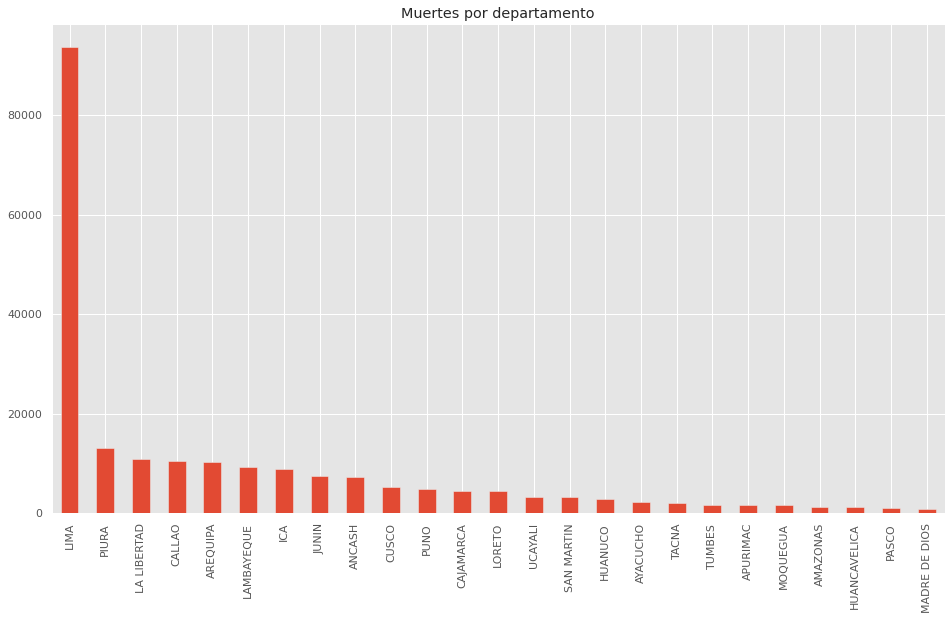

In [ ]:
df['DEPARTAMENTO'].value_counts().plot(kind='bar', title='Muertes por departamento')
df['DEPARTAMENTO'].value_counts(1).sort_index

Se observa que Lima concentra la mayoría de fallecimientos por Covid en el Perú con un 44%.

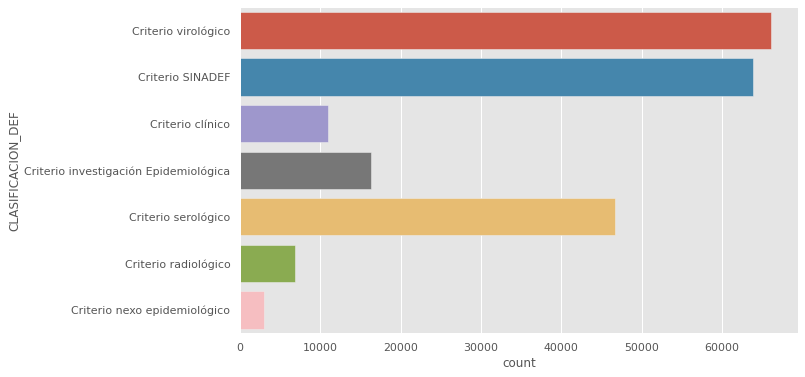

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, y = "CLASIFICACION_DEF")

Observamos el criterio o clasificación de cese que le dá el Ministerio de Salud. Siendo el criterio virológico el que tiene mayor volúmen.

In [ ]:
df['Year'] = df['FECHA_FALLECIMIENTO'].dt.year 

In [ ]:
df.groupby(['Year']).size().reset_index(name='Q fallecidos')

,Year,Q fallecidos
0,2020,94783
1,2021,108726
2,2022,10292
